In [1]:
from IPython.core.display import SVG
import pandas as pd

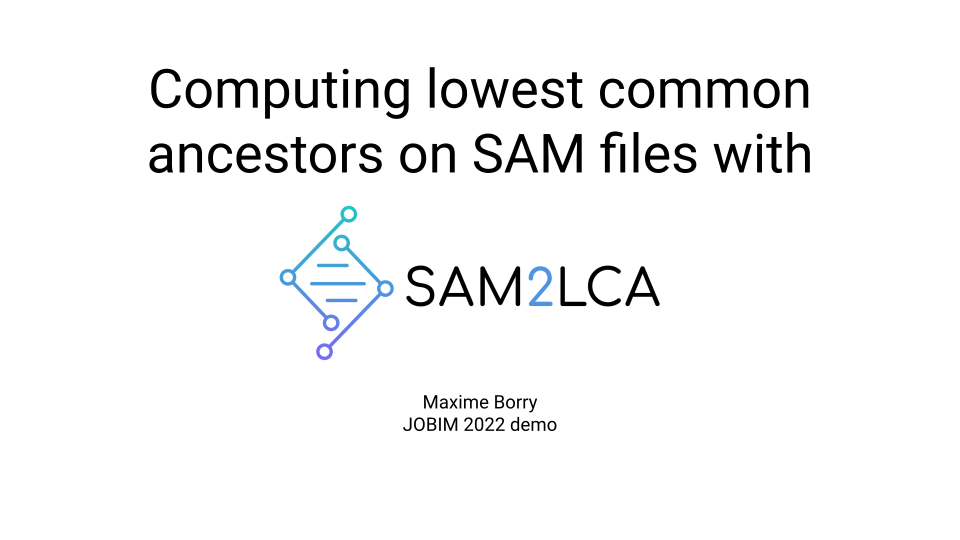

In [2]:
SVG(filename='img/title.svg')

# How to follow

- Presentation: [maximeborry.com/sam2lca_demo](http://maximeborry.com/sam2lca_demo)


<img src="img/qr-code.png" alt="maximeborry.com/sam2lca_demo" width="200">


- Repository: [github.com/maxibor/sam2lca_demo](https://github.com/maxibor/sam2lca_demo), click on *launch binder*, or run locally





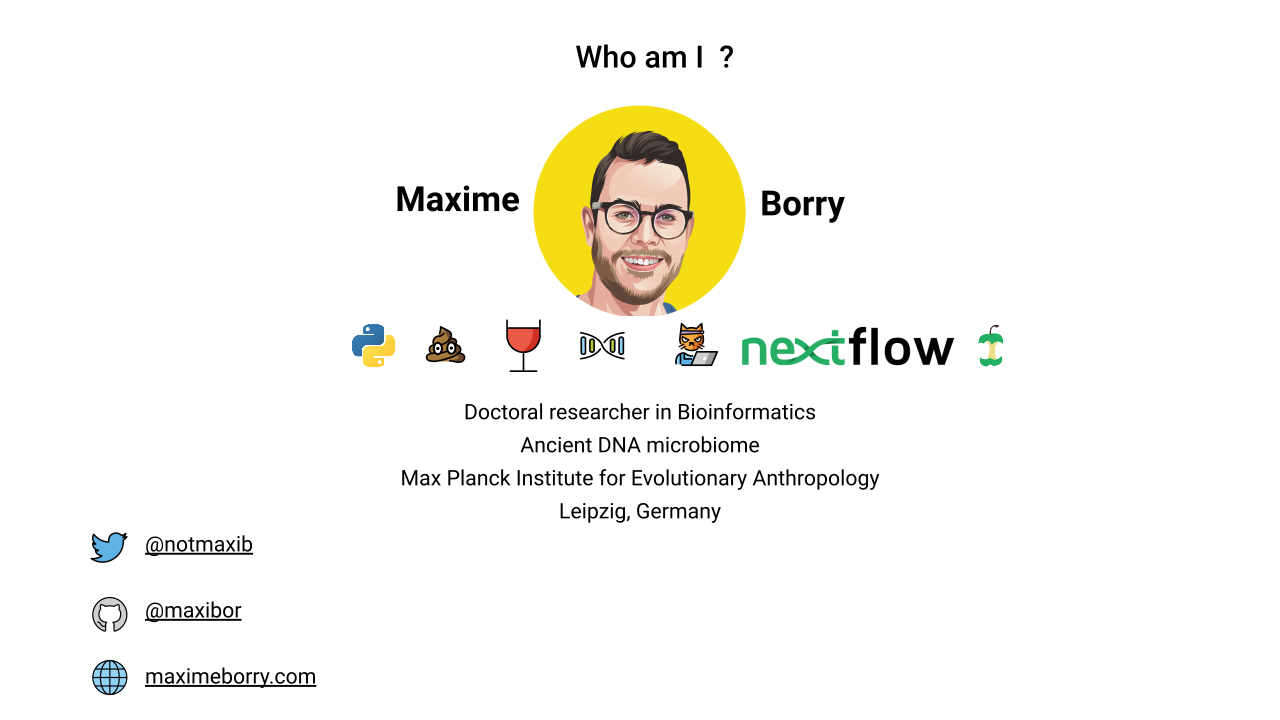

In [23]:
SVG(filename='img/whoami.svg')

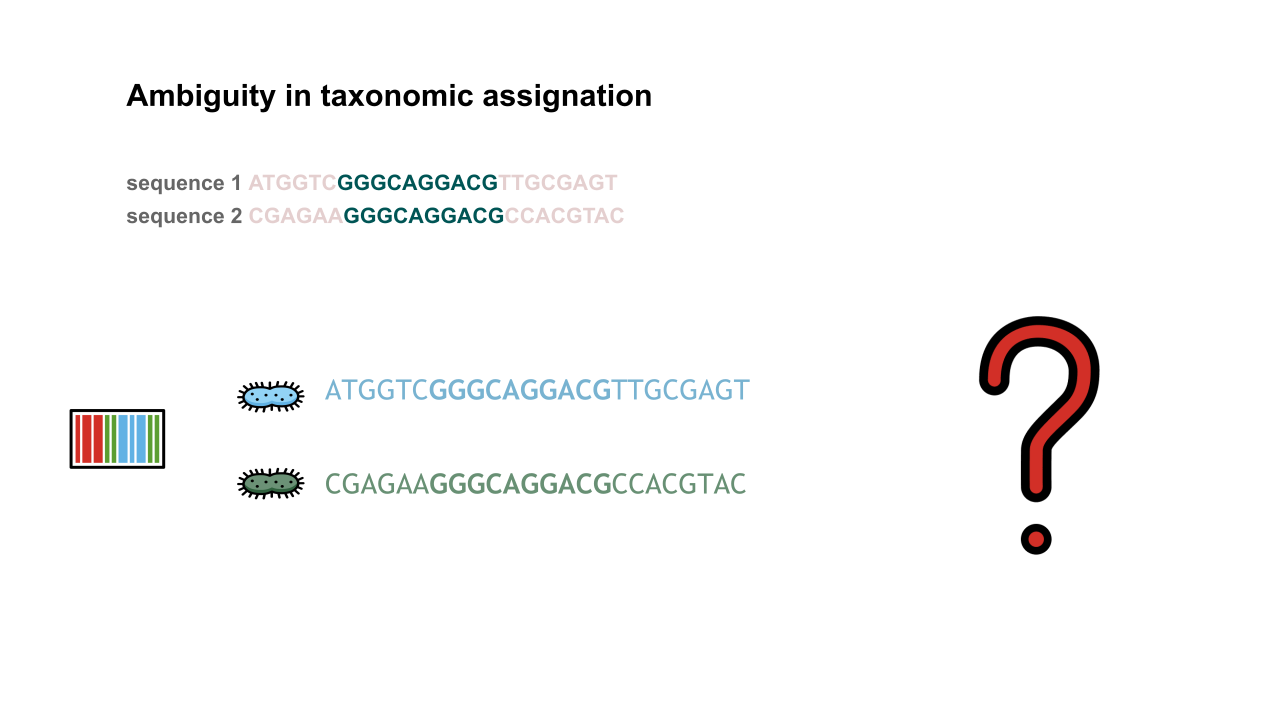

In [4]:
SVG("img/ambiguity.svg")

# The classic answer: mapping quality score - MAPQ

- Probability of uniqueness of alignment segment

- Computation varies between aligners

- Usually used in combination with a threshold to filter reads mapping to more than once (repetitive regions for example)

- Exclude reads mapped multiple times

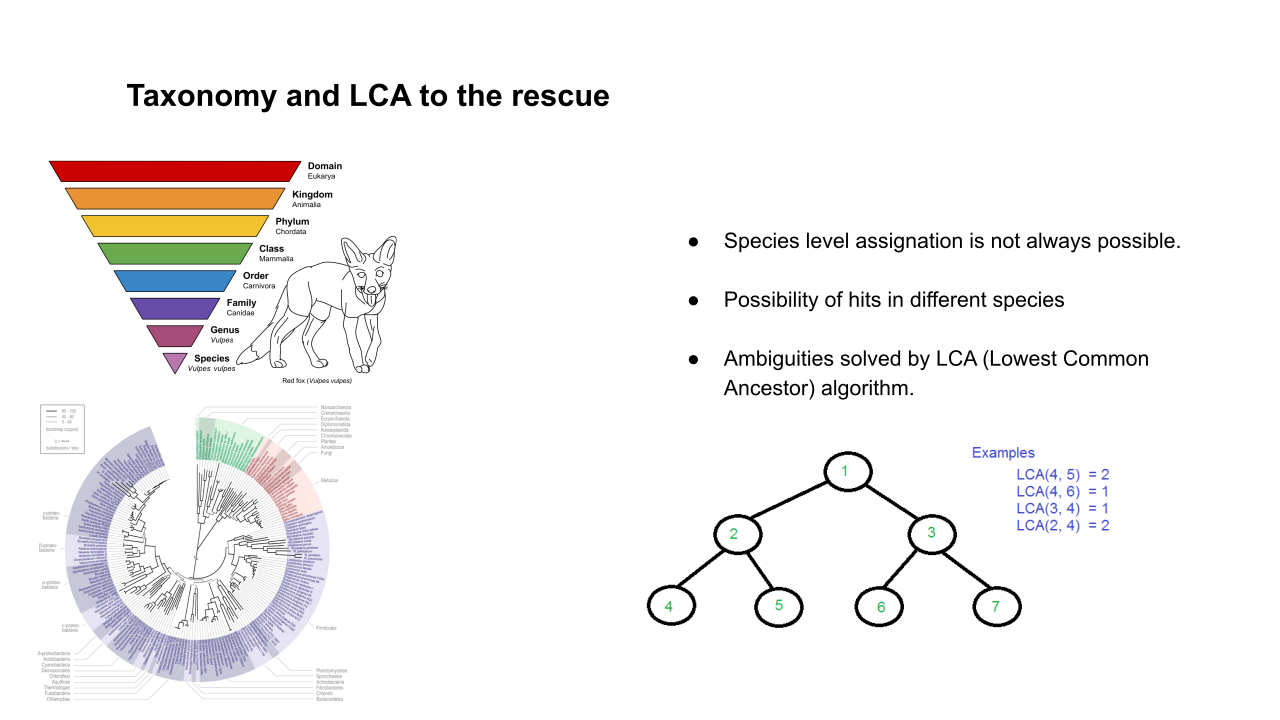

In [5]:
SVG("img/taxonomy.svg")

# Keeping multiple alignments per read - the example of Bowtie2

- Default mode: search for multiple alignments, report the best one

- `-k` mode: search for and report up to `k` alignments

- `-a` mode: search for and report all alignments

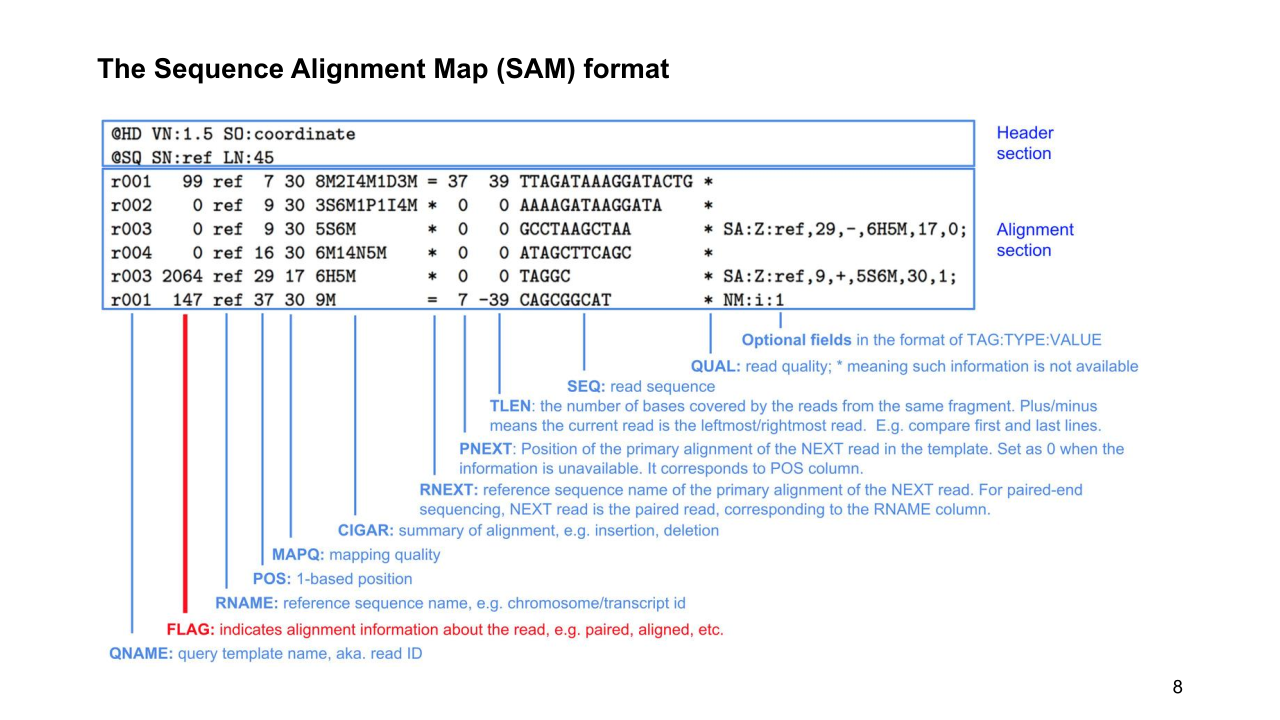

In [6]:
SVG("img/sam_format.svg")

# Installation

[github.com/maxibor/sam2lca](https://github.com/maxibor/sam2lca)

## conda/mamba

```bash
mamba install -c bioconda sam2lca
```

## pip (less recommended)

```bash
pip install sam2lca
```

# Test the installation

In [7]:
%%bash

sam2lca --help

Usage: sam2lca [OPTIONS] COMMAND [ARGS]...

  sam2lca: Lowest Common Ancestor on SAM/BAM/CRAM alignment files
  Author: Maxime Borry, Alexander Huebner
  Contact: <maxime_borry[at]eva.mpg.de>
  Homepage & Documentation: github.com/maxibor/sam2lca

Options:
  --version              Show the version and exit.
  -d, --dbdir DIRECTORY  Directory to store taxonomy databases  [default:
                         /Users/maxime/.sam2lca]
  --help                 Show this message and exit.

Commands:
  analyze    Run the sam2lca analysis
  list-db    List available taxonomy and acc2tax databases
  update-db  Download/prepare acc2tax and taxonomy databases


In [8]:
%%bash

sam2lca analyze --help

Usage: sam2lca analyze [OPTIONS] SAM

  Run the sam2lca analysis

  SAM: path to SAM/BAM/CRAM alignment file

Options:
  -t, --taxonomy TEXT         Taxonomy database to use  [default: ncbi]
  -a, --acc2tax TEXT          acc2tax database to use  [default: nucl]
  -i, --identity FLOAT RANGE  Minimum identity threshold NOTE: This argument
                              is mutually exclusive with  arguments:
                              [distance].  [default: 0.8; 0<=x<=1]
  -d, --distance INTEGER      Edit distance threshold NOTE: This argument is
                              mutually exclusive with  arguments: [identity].
  -l, --length INTEGER        Minimum alignment length  [default: 30]
  -c, --conserved             Ignore reads mapping in ultraconserved regions
  -p, --process INTEGER       Number of process for parallelization  [default:
                              2]
  -o, --output FILE           sam2lca output file. Default:
                              [basename].sam2lca.*


In [9]:
%%bash

sam2lca analyze --acc2tax test --taxonomy test -o results/sam2lca/microtest data/microtest.sorted.bam

Step 1/7: Loading taxonomy database
Step 2/7: Loading acc2tax database
Step 3/7: Converting accession numbers to TAXIDs
100%|██████████| 2/2 [00:00<00:00, 2828.26it/s]
Step 4/7: Parsing reads in alignment file
100%|██████████| 4/4 [00:00<00:00, 3463.50reads/s]
Step 5/7: Assigning LCA to reads
100%|██████████| 1/1 [00:00<00:00, 8683.86it/s]
Step 6/7: Converting TAXIDs to taxonomic lineages
100%|██████████| 7/7 [00:00<00:00, 28560.44it/s]
Step 7/7: writing sam2lca results:
* JSON to results/sam2lca/microtest.sam2lca.json
* CSV to results/sam2lca/microtest.sam2lca.csv


# A more realistic example

Using the [sam2lca tutorial: sam2lca.readthedocs.io/en/latest/tutorial.html](https://sam2lca.readthedocs.io/en/latest/tutorial.html)

Identifying a plant species from sequencing data, using the Angiosperms353 marker set

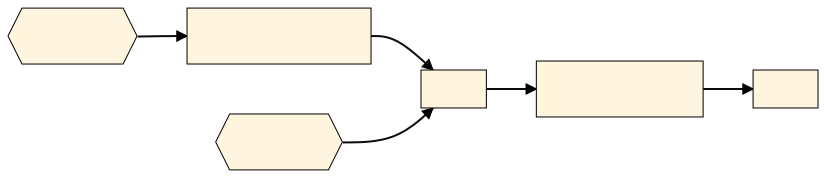

In [10]:
SVG("img/workflow.svg")

## The angiosperms353 marker set

353 nuclear markers covering flowering plants, derived from the 1000 plant transcriptomes project

[treeoflife.kew.org](https://treeoflife.kew.org/)

[McDonnell, Angela J., et al. "Exploring Angiosperms353: Developing and applying a universal toolkit for flowering plant phylogenomics." Applications in Plant Sciences 9.7 (2021).](https://doi.org/10.1002/aps3.11443)

## Preprocessing the reads


In [11]:
%%bash

fastp \
-i data/metagenome.1.fastq.gz \
-I data/metagenome.2.fastq.gz \
-o results/fastp/metagenome_trimmed.R1.fastq.gz \
-O results/fastp/metagenome_trimmed.R2.fastq.gz

Read1 before filtering:
total reads: 100
total bases: 7600
Q20 bases: 6989(91.9605%)
Q30 bases: 6649(87.4868%)

Read2 before filtering:
total reads: 100
total bases: 7600
Q20 bases: 7018(92.3421%)
Q30 bases: 6527(85.8816%)

Read1 after filtering:
total reads: 89
total bases: 6695
Q20 bases: 6370(95.1456%)
Q30 bases: 6082(90.8439%)

Read2 after filtering:
total reads: 89
total bases: 6695
Q20 bases: 6336(94.6378%)
Q30 bases: 5902(88.1553%)

Filtering result:
reads passed filter: 178
reads failed due to low quality: 22
reads failed due to too many N: 0
reads failed due to too short: 0
reads with adapter trimmed: 8
bases trimmed due to adapters: 138

Duplication rate: 0%

Insert size peak (evaluated by paired-end reads): 107

JSON report: fastp.json
HTML report: fastp.html

fastp -i data/metagenome.1.fastq.gz -I data/metagenome.2.fastq.gz -o results/fastp/metagenome_trimmed.R1.fastq.gz -O results/fastp/metagenome_trimmed.R2.fastq.gz 
fastp v0.23.2, time used: 1 seconds


## Indexing the refence sequences with Bowtie2

In [12]:
%%bash

gunzip -c data/tutorial_db.fa.gz  > tmp/tutorial_db.fa

bowtie2-build tmp/tutorial_db.fa results/bt2/angiosperms353

Settings:
  Output files: "results/bt2/angiosperms353.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  tmp/tutorial_db.fa


Building a SMALL index


Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
bmax according to bmaxDivN setting: 119687
Using parameters --bmax 89766 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 89766 --dcv 1024
Constructing suffix-array element generator
Building DifferenceCoverSample
  Building sPrime
  Building sPrimeOrder
  V-Sorting samples
  V-Sorting samples time: 00:00:00
  Allocating rank array
  Ranking v-sort output
  Ranking v-sort output time: 00:00:00
  Invoking Larsson-Sadakane on ranks
  Invoking Larsson-Sadakane on ranks time: 00:00:00
  Sanity-checking and returning
Building samples
Reserving space for 12 sample suffixes
Generating random suffixes
QSorting 12 sample offsets, eliminating duplicates
QSorting sample offsets, eliminating duplicates time: 00:00:00
Multikey QSortin

Renaming results/bt2/angiosperms353.3.bt2.tmp to results/bt2/angiosperms353.3.bt2
Renaming results/bt2/angiosperms353.4.bt2.tmp to results/bt2/angiosperms353.4.bt2
Renaming results/bt2/angiosperms353.1.bt2.tmp to results/bt2/angiosperms353.1.bt2
Renaming results/bt2/angiosperms353.2.bt2.tmp to results/bt2/angiosperms353.2.bt2
Renaming results/bt2/angiosperms353.rev.1.bt2.tmp to results/bt2/angiosperms353.rev.1.bt2
Renaming results/bt2/angiosperms353.rev.2.bt2.tmp to results/bt2/angiosperms353.rev.2.bt2


## Aligning the reads against the reference

> Note the `-k` flag used for Bowtie2

In [13]:
%%bash

bowtie2 \
-x results/bt2/angiosperms353 \
-k 50 \
-1 results/fastp/metagenome_trimmed.R1.fastq.gz \
-2 results/fastp/metagenome_trimmed.R2.fastq.gz | samtools sort -O bam > results/aln/metagenome.sorted.bam

samtools index results/aln/metagenome.sorted.bam results/aln/metagenome.sorted.bam.bai

89 reads; of these:
  89 (100.00%) were paired; of these:
    5 (5.62%) aligned concordantly 0 times
    46 (51.69%) aligned concordantly exactly 1 time
    38 (42.70%) aligned concordantly >1 times
    ----
    5 pairs aligned concordantly 0 times; of these:
      0 (0.00%) aligned discordantly 1 time
    ----
    5 pairs aligned 0 times concordantly or discordantly; of these:
      10 mates make up the pairs; of these:
        8 (80.00%) aligned 0 times
        2 (20.00%) aligned exactly 1 time
        0 (0.00%) aligned >1 times
95.51% overall alignment rate


## Optional: bamAlignCleaner

Install with `mamba install -c bioconda bamAlignCleaner`

The bam index is used to access `bam` file efficiently, in case of aligning against large databases: 
- $P(\lvert refs \ with \ no \ aligned \ reads \rvert  = 0) \neq 0$ 
- Many references won't have any reads aligned, clogging the efficient file access by the index
- bamAlignCleaner removes unused references from the index


Example: (not used in this tutorial)
```bash
bamAlignCleaner metagenome.sorted.bam | samtools sort > metagenome.cleaned.sorted.bam
samtools index metagenome.cleaned.sorted.bam
```


# Running sam2lca

#### Getting the taxonomy and accession2taxid databases

In [14]:
%%bash
sam2lca update-db --taxonomy ncbi --acc2tax plant_markers

* Downloading/updating acc2tax plant_markers database
angiosperms353.accession2taxid.gz: 5.84MB [00:01, 4.65MB/s]                            
Inserting mappings into database
100%|██████████| 933717/933717 [00:08<00:00, 108998.20it/s]
ITS.accession2taxid.gz: 967kB [00:00, 3.34MB/s]                            
Inserting mappings into database
100%|██████████| 104343/104343 [00:00<00:00, 115178.89it/s]
rbcl.accession2taxid.gz: 680kB [00:00, 2.42MB/s]                            
Inserting mappings into database
100%|██████████| 38465/38465 [00:00<00:00, 127466.75it/s]
SILVA_138.1_SSURef_NR99.accession2taxid.gz: 5.82MB [00:00, 7.88MB/s]                            
Inserting mappings into database
100%|██████████| 510509/510509 [00:08<00:00, 63797.51it/s] 
18s_pr2_4.14.0_SSU_mothur.accession2taxid.gz: 2.33MB [00:00, 3.28MB/s]                            
Inserting mappings into database
100%|██████████| 197595/197595 [00:02<00:00, 80798.27it/s]
* Setting up ncbi taxonomy database


#### Let's check that all databases have been installed

In [15]:
%%bash
sam2lca list-db

* Available taxonomy databases: test, ncbi
* Available acc2tax databases: nucl, plant_markers, test


#### And finally, let's run sam2lca

We use the following settings:
- `--acc2tax plant_markers` from the plant_markers accession2taxid database
- `-i 0.9` to only keep reads matching with a identity above 90%
- `-b` to activate the `bam` output

In [16]:
%%bash
mkdir -p results
sam2lca analyze --acc2tax plant_markers -b -i 0.9 -o results/sam2lca/metagenome results/aln/metagenome.sorted.bam

Step 1/7: Loading taxonomy database
Step 2/7: Loading acc2tax database
Step 3/7: Converting accession numbers to TAXIDs
100%|██████████| 142/142 [00:00<00:00, 2833.14it/s]
Step 4/7: Parsing reads in alignment file
100%|██████████| 306/306 [00:00<00:00, 249942.95reads/s]
Step 5/7: Assigning LCA to reads
100%|██████████| 86/86 [00:00<00:00, 167694.16it/s]
Step 6/7: Converting TAXIDs to taxonomic lineages
100%|██████████| 21/21 [00:00<00:00, 125649.62it/s]
Step 7/7: writing sam2lca results:
* JSON to results/sam2lca/metagenome.sam2lca.json
* CSV to results/sam2lca/metagenome.sam2lca.csv
* Writing BAM file with taxonomic information tag to results/sam2lca/metagenome.bam
100%|██████████| 306/306 [00:00<00:00, 55173.98reads/s]


## The sam2lca output files

In [17]:
%%bash
tree results/sam2lca

results/sam2lca
├── README
├── metagenome.bam
├── metagenome.sam2lca.csv
├── metagenome.sam2lca.json
├── microtest.sam2lca.csv
└── microtest.sam2lca.json

0 directories, 6 files


## So, which plant was it ?

In [18]:
df = pd.read_csv("results/sam2lca/metagenome.sam2lca.csv", index_col='TAXID')
df

,name,rank,count_taxon,count_descendant,lineage
TAXID,,,,,
3398,Magnoliopsida,class,1,86,class: Magnoliopsida || clade: Embryophyta || ...
35493,Streptophyta,phylum,0,86,phylum: Streptophyta || kingdom: Viridiplantae...
58024,Spermatophyta,clade,0,86,clade: Embryophyta || subphylum: Streptophytin...
131567,cellular organisms,no rank,0,86,NaN
2759,Eukaryota,superkingdom,0,86,superkingdom: Eukaryota
33090,Viridiplantae,kingdom,0,86,kingdom: Viridiplantae || superkingdom: Eukaryota
1,root,no rank,0,86,NaN
131221,Streptophytina,subphylum,0,86,subphylum: Streptophytina || phylum: Streptoph...
3193,Embryophyta,clade,0,86,clade: Embryophyta || subphylum: Streptophytin...


In [19]:
df.query("rank == 'species'").sort_values("count_descendant", ascending=False)

,name,rank,count_taxon,count_descendant,lineage
TAXID,,,,,
3483,Cannabis sativa,species,49,49,species: Cannabis sativa || genus: Cannabis ||...


## The sam2lca `bam` output

The same `bam` as the input, but with extra goodies for each read:
- a `XT` tag with the TAXID of the LCA
- a `XR` tag with the rank of the LCA
- a `XN` tag with the name of the LCA

In [20]:
%%bash

samtools view results/sam2lca/metagenome.bam | head -n 1

oneKP_76	355	6270_Touchardia_latifolia	145	255	76M	=	196	127	GACATAGACTATGGGAATGATGTGTTAACCTTGAAGCTTGGTGATTTAGGAACGTATGTGTTGAACAAACAAACTC	?D;DBCBDAE:AEEAED?<C?<D?9?D?DDD?DADCC=.-;'>?77?).6;6>>A5-;;>>:;<5=1>;:2)(89>	AS:i:-26	XS:i:-9	XM:i:7	XO:i:0	XG:i:0	NM:i:7	MD:Z:20G2T12T1A2G2A2G28	YS:i:-40	YT:Z:CP	XT:i:3398	XN:Z:Magnoliopsida	XR:Z:class


#### An example of the filter expressions of [`samtools view`](http://www.htslib.org/doc/samtools-view.html)

In [21]:
%%bash
samtools view -e '[XR] == "class"' results/sam2lca/metagenome.bam

oneKP_76	355	6270_Touchardia_latifolia	145	255	76M	=	196	127	GACATAGACTATGGGAATGATGTGTTAACCTTGAAGCTTGGTGATTTAGGAACGTATGTGTTGAACAAACAAACTC	?D;DBCBDAE:AEEAED?<C?<D?9?D?DDD?DADCC=.-;'>?77?).6;6>>A5-;;>>:;<5=1>;:2)(89>	AS:i:-26	XS:i:-9	XM:i:7	XO:i:0	XG:i:0	NM:i:7	MD:Z:20G2T12T1A2G2A2G28	YS:i:-40	YT:Z:CP	XT:i:3398	XN:Z:Magnoliopsida	XR:Z:class
oneKP_76	403	6270_Touchardia_latifolia	196	255	76M	=	145	-127	ACGTATGTGTTGAACAAACAAACTCCTAATAGACAAATTTGGTTGTTCTCACCAATAAGTGGTCCTTCCAGATTCG	BA?@CCA@BBBCACDBBHEBCGGGGGEFCFCFHGGGGIIIIIGFIJIJJJIJJJJJJJJJJJJJJJJJHHHHHFFF	AS:i:-40	XS:i:-22	XM:i:7	XO:i:0	XG:i:0	NM:i:7	MD:Z:29C16C3T3G1G2C8A7	YS:i:-26	YT:Z:CP	XT:i:3398	XN:Z:Magnoliopsida	XR:Z:class
oneKP_76	403	6270_Urera_baccifera	85	255	76M	=	34	-127	ACGTATGTGTTGAACAAACAAACTCCTAATAGACAAATTTGGTTGTTCTCACCAATAAGTGGTCCTTCCAGATTCG	BA?@CCA@BBBCACDBBHEBCGGGGGEFCFCFHGGGGIIIIIGFIJIJJJIJJJJJJJJJJJJJJJJJHHHHHFFF	AS:i:-39	XS:i:-22	XM:i:7	XO:i:0	XG:i:0	NM:i:7	MD:Z:29C16C3T2G0G13T5T1	YS:i:-30	YT:Z:CP	XT:i:3398	XN:Z:Magnol

# Try it out 

- Github repo: [github.com/maxibor/sam2lca](https://github.com/maxibor/sam2lca)

- Documentation: [sam2lca.readthedocs.io](https://sam2lca.readthedocs.io)

- **Get a sticker !**

- Publication: [Borry et al., (2022). sam2lca: Lowest Common Ancestor for SAM/BAM/CRAM alignment files. Journal of Open Source Software, 7(74), 4360](https://doi.org/10.21105/joss.04360)
